In [19]:
import numpy as np
data = np.load( "../data/MSL/MSL_test.npy")
label = np.load( "../data/MSL/MSL_test_label.npy")
train = np.load( "../data/MSL/MSL_train.npy")
print(data)
print(len(data))
print(len(data[0]))

# print(train)
print(len(train))
print(len(train[0]))

print(label)
print(len(label))

[[-0.94695788  0.          0.         ...  0.          0.
   0.        ]
 [-0.94227769  0.          0.         ...  0.          0.
   0.        ]
 [-0.93603744  0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.50122056  0.          0.         ...  0.          0.
   0.        ]
 [ 0.50122056  0.          0.         ...  0.          0.
   0.        ]
 [-0.95421168  0.          0.         ...  0.          0.
   0.        ]]
73729
55
58317
55
[False False False ... False False False]
73729


In [20]:
import pandas as pd

train_data_origin = pd.read_excel(( 'dataset/charger/charger_train.xlsx'), header=3, usecols=['开始SOC', '结束SOC', '充电时长（分钟）', '尖电量（kWh）', '峰电量（kWh）', '平电量（kWh）', '低谷电量（kWh）', '总电量（kWh）', '应付（元）'], na_values='#N').to_numpy()
test_data_origin = pd.read_excel(( 'dataset/charger/charger_test.xlsx'), header=3, usecols=['开始SOC', '结束SOC', '充电时长（分钟）', '尖电量（kWh）', '峰电量（kWh）', '平电量（kWh）', '低谷电量（kWh）', '总电量（kWh）', '应付（元）'], na_values='#N').to_numpy()

np.save('dataset/charger/charger_train.npy', train_data_origin)
np.save('dataset/charger/charger_test.npy', test_data_origin)
print(train_data_origin)
print(len(train_data_origin))
print(len(train_data_origin[0]))

print(len(test_data_origin))

[[4.1000e+01 1.0000e+02 1.2452e+02 ... 2.7837e+02 2.7837e+02 2.0042e+02]
 [3.7000e+01 1.0000e+02 1.2300e+02 ... 2.9302e+02 2.9302e+02 2.1098e+02]
 [7.5000e+01 1.0000e+02 7.0230e+01 ... 1.2786e+02 1.2786e+02 9.2060e+01]
 ...
 [4.2000e+01 4.2000e+01 8.7000e-01 ... 1.6000e+00 1.6000e+00 1.1200e+00]
 [3.2000e+01 3.2000e+01 7.0000e-02 ... 0.0000e+00 4.0000e-02 4.0000e-02]
 [4.8000e+01 4.8000e+01 2.3000e-01 ... 0.0000e+00 1.2000e-01 1.2000e-01]]
460
9
269


In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_excel(( 'dataset/charger/charger1_0.xlsx'),  na_values='#N')

# 假设你已经知道哪些列是字符串类型，或者你可以这样自动找出它们
str_columns = data.select_dtypes(include=[object]).columns

# 创建一个 LabelEncoder 对象
encoder = LabelEncoder()

# 对每个字符串列应用 LabelEncoder
for column in str_columns:
    data[column] = encoder.fit_transform(data[column])
    
    # 填充NaN值
    data[column].fillna(data[column].mean(), inplace=True)

    # 确保没有无限值
    data.replace([np.inf, -np.inf], 0, inplace=True)


data = data[data['electricity'] != 0]
# print(data.head())

# print(data.shape)
# # 提取标签列
# print(data.head())

labels = data['electricity'].values


from sklearn.preprocessing import StandardScaler
import pandas as pd

# 创建StandardScaler对象
scaler = StandardScaler()

# 假设df是你的DataFrame
df_standardized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# 提取除标签外的特征数据
features = df_standardized.to_numpy()
# features = df_standardized.drop(columns=['stop_reason']).to_numpy()
data[column].fillna(-1, inplace=True)

# 显示一些信息确保数据加载正确
print("标签数组维度:", labels.shape)
print("特征数组维度:", features.shape)

# 随机打乱数据
# np.random.shuffle(charge1)


# 计算分割点
split_index = int(0.8 * len(features))  # 20%的数据用于测试集

# 分割数据
train_data = features[:split_index]
test_data = features[split_index:]
test_data_label = labels[split_index:]



np.save('dataset/charger/charger1_test.npy', test_data)
np.save('dataset/charger/charger1_train.npy', train_data)
np.save('dataset/charger/charger1_test_label.npy', test_data_label)


# Replacing NaNs with the mean of the column (if it's a numerical dataset)

# for column in str_columns:
#     data[column].fillna(-1, inplace=True)

# # Assuming `data` is your dataset
# print("Number of NaN values:", np.isnan(data).sum())
# print("Number of infinite values:", np.isinf(data).sum())



标签数组维度: (21692,)
特征数组维度: (21692, 40)


/home/kyuan/miniconda3/envs/timesnet/lib/python3.8/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/kyuan/miniconda3/envs/timesnet/lib/python3.8/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/kyuan/miniconda3/envs/timesnet/lib/python3.8/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


station_code


ValueError: 'c' argument has 150 elements, which is inconsistent with 'x' and 'y' with size 92.

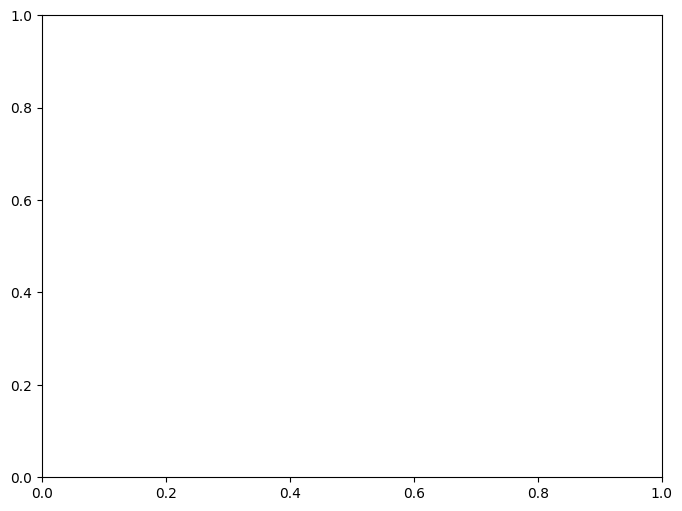

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


data = pd.read_excel(( 'dataset/charger/charger1.xlsx'),  na_values='#N')

# 初始化独热编码器
encoder = OneHotEncoder(sparse_output=False)

# 存储编码后的DataFrame
encoded_data = pd.DataFrame()

# for column in data.columns:
column = "station_code"
print(column)
# 检查列是否为非数字类型
if data[column].dtype == 'object':
    # 去重
    unique_values = data[[column]].drop_duplicates()
    
    # 独热编码
    encoded = encoder.fit_transform(unique_values)
    
    
    # 转换编码结果为DataFrame，并添加合适的列名
    encoded_df = pd.DataFrame(encoded, columns=[f"{column}_{cat}" for cat in encoder.categories_[0]])
    
    # 将编码结果加入到结果DataFrame
    encoded_data = pd.concat([encoded_data, encoded_df], axis=1)

# 应用PCA
pca = PCA(n_components=2)  # 降低到2维
X_pca = pca.fit_transform(encoded_data)


# 可视化结果
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Combined Dataset')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

# 显示编码后的结果
print("编码后的数据:")
print(encoded_data)

# 显示原始数据
print("原始数据:")
print(data)




In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 加载数据集（这里使用Iris数据集作为示例，实际上Iris数据集不含分类特征，此处仅为演示）
data = load_iris()
X = data.data
y = data.target

# 假设将y转换为分类特征（实际操作中应根据数据情况进行）
df = pd.DataFrame(X, columns=data.feature_names)
df['species'] = pd.Categorical.from_codes(y, categories=data.target_names)

# 独热编码
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(df[['species']])  # 只对species列进行编码

# 合并编码后的数据与原始数据
X_combined = pd.concat([df.drop(columns=['species']), pd.DataFrame(X_encoded, columns=encoder['species'])], axis=1)

# 应用PCA
pca = PCA(n_components=2)  # 降低到2维
X_pca = pca.fit_transform(X_combined)

# 可视化结果
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Combined Dataset')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


TypeError: 'OneHotEncoder' object is not subscriptable

In [79]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_excel(( 'dataset/charger/charger1.xlsx'), na_values='#N')

# 假设你已经知道哪些列是字符串类型，或者你可以这样自动找出它们
str_columns = data.select_dtypes(include=[object]).columns
# electricity
print(str_columns)


# 假设将y转换为分类特征（实际操作中应根据数据情况进行）
# df = pd.DataFrame(data, columns=str_columns)
df = pd.DataFrame(data)
# df['species'] = pd.Categorical.from_codes(y, categories=data.target_names)

# 假设 df 是原始 DataFrame
# 转换 'start_time' 和 'end_time' 到 datetime 格式2023-06-01 21:01:50
df['start_time'] = pd.to_datetime(df['start_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['end_time'] = pd.to_datetime(df['end_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['create_time'] = pd.to_datetime(df['create_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# 计算充电持续时间（以分钟为单位）
df['charging_duration'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60


# 使用 pd.factorize() 转换 'vin' 列
labels, unique = pd.factorize(df['vin'])

# 将生成的标签数组添加为新列或替换原有列
df['vin_encoded'] = labels

# 提取更多时间相关特征
df['start_hour'] = df['start_time'].dt.hour
df['weekday'] = df['start_time'].dt.weekday
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# 如果需要，进行分类特征的编码
df = pd.get_dummies(df, columns=['station_code', 'stop_reason', 'start_type'])

# 删除不再需要的列或明确不相关的列
df.drop(['record_index', 'start_up_time','modify_time','vin', 'park_money', 'repair_status', 'rate_data', 'order_code', 'user_id', 'operator_code', 'original_data', 'charging_pile_code', 'charging_gun_code'], axis=1, inplace=True)

# 最终查看数据集
print(df.head())

print(df.shape)


Index(['id', 'station_code', 'charging_pile_code', 'charging_gun_code',
       'record_index', 'order_code', 'user_id', 'operator_code', 'vin',
       'start_time', 'end_time', 'start_value', 'start_type', 'start_up_time',
       'elect_money', 'park_money', 'rate_data', 'original_data',
       'create_time', 'modify_time'],
      dtype='object')
      id  source  card_balance          start_time            end_time  \
0  91726   100.0           0.0 2023-06-01 21:01:50 2023-06-01 21:02:06   
1  91727   100.0           0.0 2023-06-01 21:02:36 2023-06-01 21:02:52   
2  91728   100.0           0.0 2023-06-01 21:00:44 2023-06-01 21:00:59   
3  91729   100.0           0.0 2023-06-01 21:03:22 2023-06-01 21:03:54   
4  91730   100.0           0.0 2023-06-01 21:00:02 2023-06-01 21:00:17   

   start_elect  end_elect  start_soc  end_soc  charging_model start_value  \
0     11658.44   11658.44        0.0      0.0             4.0        0.00   
1     11658.44   11658.44        0.0      0.0       

Index(['id', 'station_code', 'charging_pile_code', 'charging_gun_code',
       'record_index', 'order_code', 'user_id', 'operator_code', 'vin',
       'start_value', 'start_type', 'start_up_time', 'elect_money',
       'park_money', 'rate_data', 'original_data', 'modify_time'],
      dtype='object')
    card_balance  start_soc  end_soc  vin_encoded  start_value_normalized  \
20           0.0       0.70      1.0            0                0.000000   
21           0.0       0.53      1.0           -1                0.000000   
22           0.0       0.27      1.0           -1                0.000000   
23           0.0       0.34      1.0           -1                0.000000   
24           0.0       0.00      0.0            0                0.004403   

    charging_duration_normalized  time_part_normalized  start_hour  end_hour  \
20                      0.499316              0.052632        20.0      21.0   
21                      0.499332              0.052632        18.0      21.0

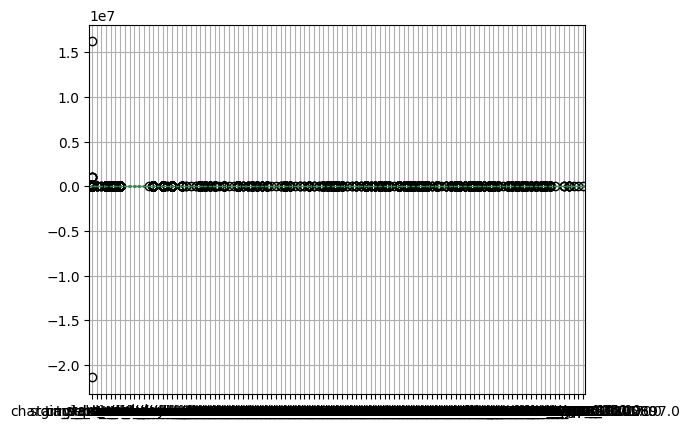

In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_excel(( 'dataset/charger/charger1.xlsx'), na_values='#N')



# 假设将y转换为分类特征（实际操作中应根据数据情况进行）
# df = pd.DataFrame(data, columns=str_columns)
df = pd.DataFrame(data)
# df['species'] = pd.Categorical.from_codes(y, categories=data.target_names)

df['electricity'] = df['end_elect'] - df['start_elect']

# 假设 df 是原始 DataFrame
# 转换 'start_time' 和 'end_time' 到 datetime 格式2023-06-01 21:01:50
df['start_time'] = pd.to_datetime(df['start_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['end_time'] = pd.to_datetime(df['end_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['create_time'] = pd.to_datetime(df['create_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# 计算充电持续时间（以分钟为单位）
df['charging_duration'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60

# 尝试转换为数值，非数值转为 NaN

# 假设你已经知道哪些列是字符串类型，或者你可以这样自动找出它们
str_columns = data.select_dtypes(include=[object]).columns
for column in str_columns:
    data[column].fillna(0, inplace=True)
    data[column] = pd.to_numeric(data[column], errors='coerce')

# electricity
print(str_columns)


# 使用 pd.factorize() 转换 'vin' 列
labels, unique = pd.factorize(df['vin'])

# 将生成的标签数组添加为新列或替换原有列
df['vin_encoded'] = labels


# # 使用 pd.factorize() 转换 'vin' 列
# labels, unique = pd.factorize(df['source'])

# # 将生成的标签数组添加为新列或替换原有列
# df['source_encoded'] = labels
# # 使用 pd.factorize() 转换 'vin' 列
# labels, unique = pd.factorize(df['charging_model'])

# # 将生成的标签数组添加为新列或替换原有列
# df['charging_model_encoded'] = labels
# # 使用 pd.factorize() 转换 'vin' 列
# labels, unique = pd.factorize(df['rate_type'])

# # 将生成的标签数组添加为新列或替换原有列
# df['rate_type_encoded'] = labels
df['start_soc'] = df['start_soc']/100.0
df['end_soc'] = df['end_soc']/100.0
import json

# 定义一个函数来解析 JSON 并计算 elect 的和
def calculate_elect_sum(json_str):
    # 检查输入是否是字符串
    if isinstance(json_str, str):
        try:
            # 解析 JSON 字符串
            items = json.loads(json_str)
            # 计算 elect 的和
            return sum(item["elect"] for item in items)
        except json.JSONDecodeError:
            # 如果 JSON 解析失败，返回 NaN 或某个错误指示值
            return 0
    else:
        # 如果不是字符串，返回 NaN
        return 0


# 最小-最大归一化
df['start_value_normalized'] = (df['start_value'] - df['start_value'].min()) / (df['start_value'].max() - df['start_value'].min())
# df['card_balance_normalized'] = (df['card_balance'] - df['card_balance'].min()) / (df['card_balance'].max() - df['card_balance'].min())
df['electricity_normalized'] = (df['electricity'] - df['electricity'].min()) / (df['electricity'].max() - df['electricity'].min())
df['charging_duration_normalized'] = (df['charging_duration'] - df['charging_duration'].min()) / (df['charging_duration'].max() - df['charging_duration'].min())
df['time_part_normalized'] = (df['time_part'] - df['time_part'].min()) / (df['time_part'].max() - df['time_part'].min())

# 应用这个函数到每个单元格
df['rate_data_elec'] = df['rate_data'].apply(calculate_elect_sum)
from sklearn.preprocessing import LabelEncoder

labels_1 = df['stop_reason'].values
# 创建LabelEncoder对象
encoder = LabelEncoder()

# 拟合并转换标签
encoded_labels = encoder.fit_transform(labels_1)
labels_1 = encoded_labels
# 计算所有elect值的总和

# 提取更多时间相关特征
df['start_hour'] = df['start_time'].dt.hour
df['end_hour'] = df['end_time'].dt.hour
df['weekday'] = df['start_time'].dt.weekday
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# 如果需要，进行分类特征的编码
# df = pd.get_dummies(df, columns=['station_code', 'stop_reason', 'start_type'])
df = pd.get_dummies(df, columns=['station_code',  'start_type'])

# 删除不再需要的列或明确不相关的列
df.drop(['id','record_index','electricity_normalized','stop_reason',  'electricity' ,'rate_data', 'rate_data_elec', 'source','modifier_id', 'sn_code','charging_model','time_part', 'charging_duration','creater_id', 'electricity', 'elect_money','start_value',  'service_money', 'process_state','create_time',  'throwable_type', 'start_time','rate_type', 'rate_version',  'end_time', 'vin','start_elect', 'end_elect', 'start_up_time','modify_time','vin', 'park_money', 'repair_status', 'rate_data', 'order_code', 'user_id', 'operator_code', 'original_data', 'charging_pile_code', 'charging_gun_code'], axis=1, inplace=True)

# 最终查看数据集
print(df[20:25])
print(df.head())

print(df.shape)

data = df
# 打印每列缺失值的数量
print(data.isnull().sum())

# 可以选择删除含有缺失值的行
data = data.dropna()

# 或
data = data.fillna(data.mean())  # 用平均数填充

# 检查无穷大值
print((data == np.inf).sum())
print((data == -np.inf).sum())

# 替换无穷大值
data = data.replace([np.inf, -np.inf], np.nan)  # 首先替换为NaN
data = data.dropna()  # 然后删除这些行

# 查看数据的基本统计概况
print(data.describe())

# 可以使用箱型图来可视化可能的异常值
import matplotlib.pyplot as plt

data.boxplot()
plt.show()

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# 定义异常值的条件
condition = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

# 替换或删除异常值
data[condition] = np.nan  # 替换为NaN
data = data.dropna()  # 删除包含NaN的行


features = data.to_numpy()
# 计算分割点
split_index = int(0.8 * len(features))  # 20%的数据用于测试集

# 分割数据
train_data = features[:split_index]
test_data = features[split_index:]
test_data_label = labels_1[split_index:]

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 示例：使用标准化
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(train_data)  # 注意：用训练集的参数来转换测试集


np.save('dataset/charger/charger1_test.npy', test_data)
np.save('dataset/charger/charger1_train.npy', train_data)
np.save('dataset/charger/charger1_test_label.npy', test_data_label)

In [62]:
import numpy as np

# 加载数据
data = np.load('dataset/charger/MSL_test.npy')

# 查看数据的形状
print("数据形状:", data.shape)

# 如果可能，查看前几行数据
print("数据预览:", data[:5])

# 分析最后一列的数据特性
# last_column = data[:, -1]  # 选择所有行的最后一列
print("最后一列的统计数据:", np.unique(last_column, return_counts=True))


数据形状: (73729, 55)
数据预览: [[-0.94695788  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.        ]
 [-0.94227769  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.        